In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels = [] 
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 00000138A21C5950>

In [9]:
## read an image

In [12]:
img = cv2.imread('people.jpg')

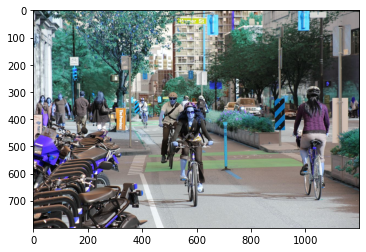

In [13]:
plt.imshow(img) ##bgr

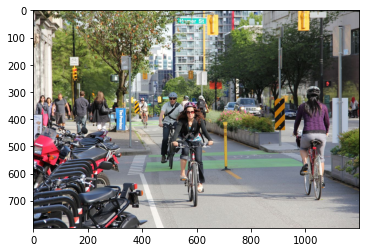

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [15]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold=0.5)

In [16]:
print(ClassIndex)

[[ 2]
 [ 2]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 4]
 [ 2]
 [ 1]
 [ 1]
 [ 4]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 4]
 [10]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 4]
 [10]
 [ 1]
 [ 4]
 [ 1]
 [ 1]
 [ 4]
 [ 1]
 [ 4]
 [ 1]]


In [17]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2 )
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

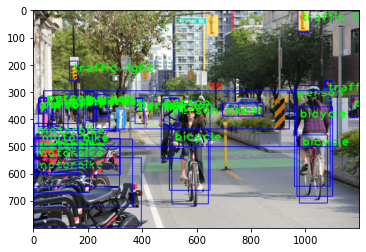

In [18]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [19]:
## Video Demo

In [20]:
cap = cv2.VideoCapture("160929_151_London_NightTraffic2_1080p.mp4")

#Check if the video opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    ClassIndex, confidece, bbox = model.detect(frame,confThreshold=0.55)
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255, 0, 0), 2 )
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
                
    cv2.imshow('Object Detection Tutorial',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[[6]
 [6]
 [3]
 [3]
 [6]
 [3]
 [3]
 [1]]
[[6]
 [6]
 [3]
 [3]
 [3]
 [6]
 [1]
 [3]
 [3]]
[[6]
 [6]
 [3]
 [3]
 [3]
 [6]
 [1]
 [3]
 [3]]
[[6]
 [6]
 [3]
 [3]
 [3]
 [6]
 [1]]
[[6]
 [6]
 [3]
 [6]
 [3]
 [1]
 [3]]
[[6]
 [6]
 [6]
 [3]
 [1]
 [3]
 [3]]
[[6]
 [6]
 [6]
 [3]
 [1]
 [3]
 [3]]
[[6]
 [6]
 [6]
 [3]
 [3]
 [3]
 [1]
 [1]
 [3]]
[[6]
 [6]
 [6]
 [3]
 [3]
 [1]
 [1]
 [1]
 [6]]
[[6]
 [6]
 [6]
 [3]
 [3]
 [1]
 [1]
 [1]
 [3]
 [6]]
[[6]
 [6]
 [3]
 [6]
 [3]
 [1]
 [6]
 [1]
 [1]
 [3]
 [3]]
[[6]
 [6]
 [3]
 [6]
 [6]
 [3]
 [1]
 [1]]
[[6]
 [6]
 [3]
 [6]
 [3]
 [1]
 [6]
 [1]
 [3]]
[[6]
 [6]
 [6]
 [3]
 [6]
 [3]
 [1]
 [1]
 [1]]
[[6]
 [6]
 [6]
 [3]
 [3]
 [6]
 [1]
 [1]
 [1]
 [3]]
[[6]
 [6]
 [6]
 [3]
 [3]
 [6]
 [1]
 [3]]
[[6]
 [6]
 [6]
 [3]
 [6]
 [1]
 [3]
 [1]]
[[6]
 [6]
 [6]
 [3]
 [6]
 [1]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [3]
 [1]
 [3]
 [3]
 [6]]
[[6]
 [6]
 [6]
 [3]
 [1]
 [1]
 [6]
 [3]
 [1]]
[[6]
 [6]
 [6]
 [3]
 [6]
 [1]
 [6]
 [1]
 [3]
 [1]
 [1]]
[[6]
 [6]
 [6]
 [6]
 [3]
 [6]
 [1]
 [3]]
[[6]
 [6]
 [6]
 [3]
 [3]
 [1]
 [3

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-q3d_8t8e\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
## WebCam

In [ ]:
cap = cv2.VideoCapture(1)

#Check if the video opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    ClassIndex, confidece, bbox = model.detect(frame,confThreshold=0.55)
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255, 0, 0), 2 )
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
                
    cv2.imshow('Object Detection Tutorial',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[[72]
 [73]]
()
[[17]]
[[17]]
[[84]
 [17]]
[[17]
 [84]]
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
[[1]]
[[1]]
()
()
()
[[17]]
()
()
[[17]]
()
()
()
()
()
()
()
()
()
()
()
()
()
[[1]]
()
()
()
()
[[1]]
()
()
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [84]]
[[1]]
[[ 1]
 [84]]
[[ 1]
 [84]]
[[84]
 [ 1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [84]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [90]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
